## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset

combined_dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Display the data table for preview

combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.

number_of_mice = combined_dataset["Mouse ID"].nunique()
number_of_mice

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_by_id = combined_dataset.loc[combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_by_id

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combined_dataset.loc[combined_dataset["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_dataframe = combined_dataset[combined_dataset['Mouse ID'].isin(duplicate_mice_by_id)==False]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_clean_df = clean_dataframe["Mouse ID"].nunique()
number_of_mice_clean_df

248

## Summary Statistics

In [17]:
# To see the data frame
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# calculate mean of tumor volume and drug regimen

mean = clean_dataframe ['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# calculate median of tumor volume and drug regimen
median = clean_dataframe ['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# calculate variance of tumor volume and drug regimen
variance = clean_dataframe ['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# calculate standard deviation of tumor volume and drug regimen
std_deviation = clean_dataframe ['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).std()
std_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# calculate SEM of tumor volume and drug regimen
std_error_of_means = clean_dataframe ['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).sem()
std_error_of_means

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Assemble the resulting series into a single summary dataframe.
summary_dataframe= pd.DataFrame({" Mean ":mean, " Median ":median, " Variance ":variance,
                                 " Std.Deviation ":std_deviation, " Std. Error of Means ":std_error_of_means})

In [24]:
summary_dataframe

,Mean,Median,Variance,Std.Deviation,Std. Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
summary_dataframe.head()

,Mean,Median,Variance,Std.Deviation,Std. Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [26]:
summary_dataframe.round(2)

,Mean,Median,Variance,Std.Deviation,Std. Error of Means
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [27]:
summary_dataframe.round(2).head()

,Mean,Median,Variance,Std.Deviation,Std. Error of Means
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen
mouse_count = clean_dataframe["Drug Regimen"].value_counts()
mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Measurements taken on each Drug Regimen')

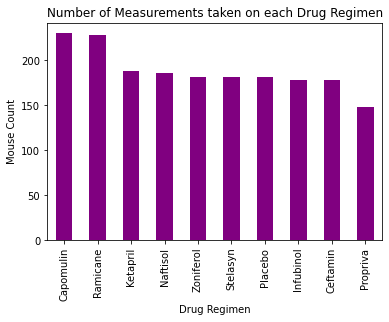

In [29]:

# Create a Pandas bar plot based off of the group series from before and label the title
bar_plot = mouse_count.plot.bar(color='purple')
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Number of Measurements taken on each Drug Regimen")

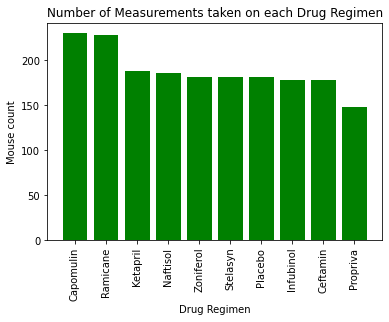

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = mouse_count.index.values
y_axis = mouse_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title

plt.bar(x_axis, y_axis, color='green', alpha=1.0, align='center')

# Set the xlabel and ylabel, title using class methods

plt.title("Number of Measurements taken on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")
plt.xticks(rotation="vertical")
plt.show()

In [31]:
gender_data = clean_dataframe["Sex"].value_counts()
gender_data

Male      958
Female    922
Name: Sex, dtype: int64

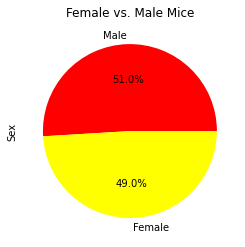

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = clean_dataframe["Sex"].value_counts()
plt.title("Female vs. Male Mice")
colors = ['red', 'yellow']
gender_data.plot.pie(colors=colors, autopct= "%1.1f%%")
plt.show()




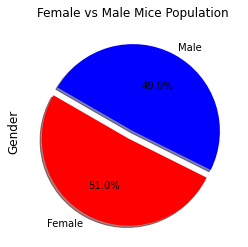

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
colors = ['red','blue']
explode = (0.1,0)
plot = gender_data.plot.pie(y='Total Count', explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle=150)
plt.title('Female vs Male Mice Population')
plt.ylabel('Gender',fontsize = 12)

plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin",:]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
capomulin_df.head().round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.00,0
11,s185,Capomulin,Female,3,17,5,43.88,0
12,s185,Capomulin,Female,3,17,10,37.61,0
13,s185,Capomulin,Female,3,17,15,38.18,0
14,s185,Capomulin,Female,3,17,20,36.87,0


In [36]:
ramicane_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ramicane",:]
ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [37]:
ramicane_df.head().round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [38]:
infubinol_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Infubinol",:]
infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [39]:
infubinol_df.head().round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.00,0
455,a203,Infubinol,Female,20,23,5,48.51,0
456,a203,Infubinol,Female,20,23,10,51.85,1
457,a203,Infubinol,Female,20,23,15,52.78,1
458,a203,Infubinol,Female,20,23,20,55.17,1


In [40]:
ceftamin_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Ceftamin",:]
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [41]:
ceftamin_df.head().round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.00,0
485,a275,Ceftamin,Female,20,28,5,46.80,0
486,a275,Ceftamin,Female,20,28,10,47.37,0
487,a275,Ceftamin,Female,20,28,15,49.73,0
488,a275,Ceftamin,Female,20,28,20,50.51,1


In [42]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
capomulin_greatest = capomulin_df.groupby('Mouse ID').max()['Timepoint']

In [43]:
# Ramicane
ramicane_greatest = ramicane_df.groupby('Mouse ID').max()['Timepoint']

In [44]:
# Infubinol
infubinol_greatest = infubinol_df.groupby('Mouse ID').max()['Timepoint']

In [45]:
# Ceftamin
ceftamin_greatest = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

In [46]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_grp_df = pd.DataFrame(capomulin_greatest)
capomulin_merge = pd.merge(capomulin_grp_df, clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [47]:
capomulin_merge.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.98,2
1,b742,45,Capomulin,Male,7,21,38.94,0
2,f966,20,Capomulin,Male,16,17,30.49,0
3,g288,45,Capomulin,Male,3,19,37.07,1
4,g316,45,Capomulin,Female,22,22,40.16,2


In [48]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
ramicane_grp_df = pd.DataFrame(ramicane_greatest)
ramicane_merge = pd.merge(ramicane_grp_df, clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [49]:
ramicane_merge.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.41,1
1,a444,45,Ramicane,Female,10,25,43.05,0
2,a520,45,Ramicane,Male,13,21,38.81,1
3,a644,45,Ramicane,Female,7,17,32.98,1
4,c458,30,Ramicane,Female,23,20,38.34,2


In [50]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
infubinol_grp_df = pd.DataFrame(infubinol_greatest)
infubinol_merge = pd.merge(infubinol_grp_df, clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [51]:
infubinol_merge.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a577,30,Infubinol,Female,6,25,57.03,2
3,a685,45,Infubinol,Male,8,30,66.08,3
4,c139,45,Infubinol,Male,11,28,72.23,2


In [52]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
ceftamin_grp_df = pd.DataFrame(ceftamin_greatest)
ceftamin_merge = pd.merge(ceftamin_grp_df, clean_dataframe, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [53]:
ceftamin_merge.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,63.00,3
1,b447,0,Ceftamin,Male,2,30,45.00,0
2,b487,25,Ceftamin,Female,6,28,56.06,1
3,b759,30,Ceftamin,Female,12,25,55.74,1
4,f436,15,Ceftamin,Female,3,25,48.72,2


In [54]:
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [55]:
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [56]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [57]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]
quartiles =ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


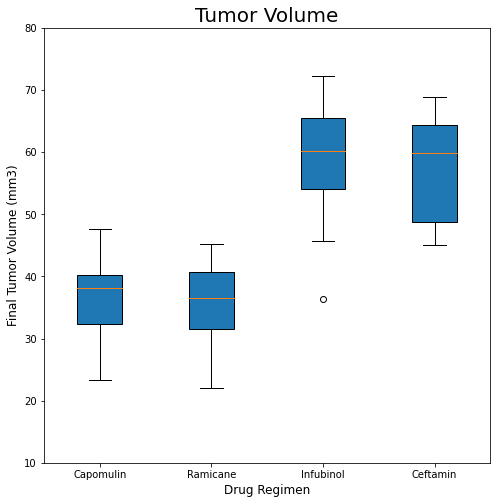

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_title('Tumor Volume',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 12)
ax1.boxplot(box_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b742",:]
line_plot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


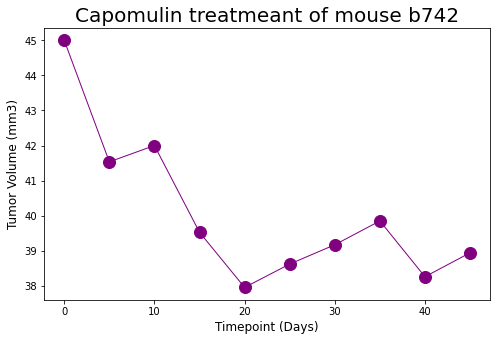

In [60]:
x_axis = line_plot_df["Timepoint"]
tumor_size = line_plot_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.title('Capomulin treatmeant of mouse b742',fontsize =20)
plt.plot(x_axis, tumor_size,linewidth=1, markersize=12,marker="o",color="purple", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)
plt.show()

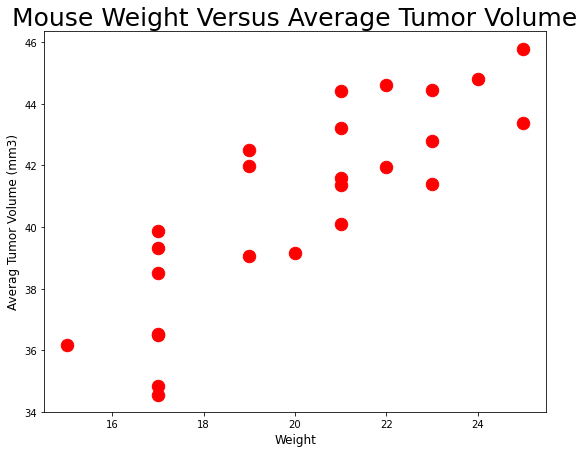

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(9, 7))
avg_tumor_vol =capomulin_df.groupby(['Mouse ID']).mean()
marker_size=15
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'],s=155, color="red")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)
plt.show()

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_coeff = round(st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_coeff}")

The correlation between mouse weight and average tumor volume is 0.84


In [63]:
x_values = avg_tumor_vol['Weight (g)']

y_values = avg_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

print(f"slope:{slope}")

print(f"intercept:{intercept}")

print(f"rvalue (Correlation coefficient):{rvalue}")

print(f"pandas (Correlation coefficient):{corr_coeff}")

print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


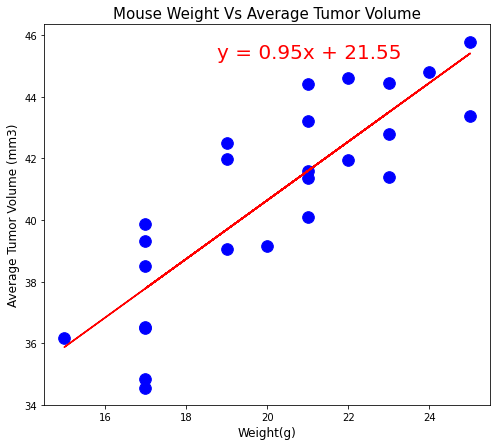

In [64]:
#Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(8, 7))
plt.scatter(x_values,y_values,s=135, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight Vs Average Tumor Volume',fontsize =15)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95),
textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=20,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Three Observations about the data

Capomulin and Ramicane were the most successful drugs in reducing the size of the tumors within the mice.

Capomulin was successful drug in reducing the size of the tumors within the mice over the period of 40 days.

The correlation between mouse weight, and average tumor volume is 0.84. 

There is a positive correlation between average tumor volume and weight, that is when the mouse weight increases the average tumor volume also increases.

The interquartile range (IQR) of Capomulin tumors is 7.78 which is lowest among all 4 drug regimen.